In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

churn_data = pd.read_csv('data/churn.csv')
churn_data.drop('RowNumber', axis=1, inplace=True) #clean the table a bit
churn_data['Exited'] = churn_data['Exited'].apply(
    lambda x:['Лояльные', 'Ушедшие'][x])
churn_data.sort_values('Exited', ascending=True, inplace=True)
churn_data.head()


,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4999,15710408,Cunningham,584,Spain,Female,38,3,0.00,2,1,1,4525.40,Лояльные
6317,15654878,Yobanna,450,France,Male,29,7,117199.80,1,1,1,43480.63,Лояльные
6316,15765643,Hamilton,725,France,Male,37,6,124348.38,2,0,1,176984.34,Лояльные
6313,15812482,Young,575,France,Male,27,3,139301.68,1,1,0,99843.98,Лояльные
6312,15648136,Green,658,Germany,Female,28,9,152812.58,1,1,0,166682.57,Лояльные


-----

### Задание 9.1
- Каково соотношение ушедших и лояльных клиентов? 
- Покажите это на графике и дайте комментарий по соотношению.

Text(0.5, 1.0, 'Распределение ушедших и лояльных клиентов')

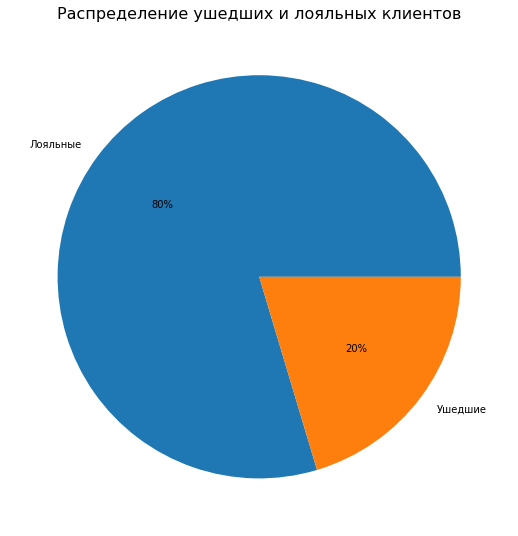

In [99]:
# firstly let's calculate the number of churn/loyal customers and create a separate status column based on 'Exited' column
pie_data = churn_data.value_counts(churn_data['Exited']).sort_index()
# plot the pie-chart
fig = plt.figure(figsize=(10,7), facecolor='white')
axes = fig.add_axes([0, 0, 1, 1])
pie = axes.pie(
    pie_data,
    labels=['Лояльные', 'Ушедшие'],
    autopct='%0.0f%%'
)
axes.set_title('Распределение ушедших и лояльных клиентов',fontsize=16)

- Churn Rate составляет 20.4%, при этом лояльных пользователей - 79.6%.
- Данное соотношение типично для подобных компаний.
- Обычно Churn Rate находится в пределах 15-25% - наш показатель в середине допустимого диапазона

### Задание 9.2
- Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. 
- Опишите распределение и сделайте выводы.

/var/folders/c5/w191_qyn6h5cz3wl_4__rjxw0000gn/T/ipykernel_8375/3548886881.py:14: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



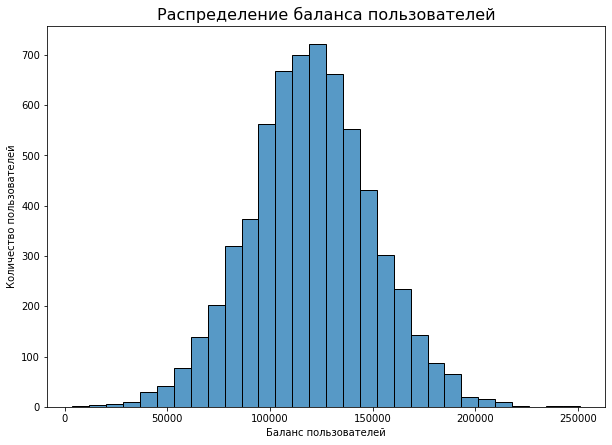

In [100]:
# filter customers with more than 2500 USD balance
hist_data = churn_data[churn_data['Balance'] > 2500]

# plot the histogram
fig = plt.figure(figsize=(10,7))
hist = sns.histplot(
    hist_data,
    x='Balance',
    bins=30,
)
hist.set_title('Распределение баланса пользователей', fontsize=16)
hist.set_xlabel('Баланс пользователей')
hist.set_ylabel('Количество пользователей')
fig.show()

- Из представленной гистограммы можно сделать вывод о нормальном распредении баланса.
- Большинство пользователей имеют баланс в районе 100 - 150 тыс. долларов 
- Количество пользователей с балансом менее 50 тыс. USD и более 200 тыс. USD - незначительно.

------

### Задание 9.3
- Посмотрите на распределение баланса клиента в разрезе признака оттока. 
- Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? 
- Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

/var/folders/c5/w191_qyn6h5cz3wl_4__rjxw0000gn/T/ipykernel_8375/622903343.py:16: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



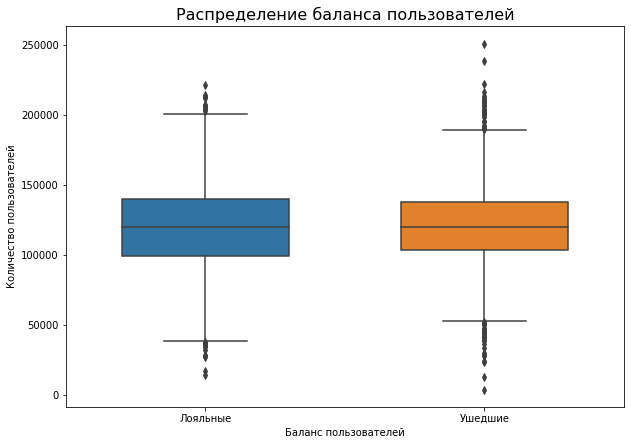

In [116]:
# let's take the same data as for previous analisys
box_data = churn_data[churn_data['Balance'] > 1500]

# plotting the scatter with data for both exited category
fig = plt.figure(figsize=(10,7))
box = sns.boxplot(
    data=box_data,
    x='Exited',
    y='Balance',
    orient='v',
    width=0.6
)
box.set_title('Распределение баланса пользователей', fontsize=16)
box.set_xlabel('Баланс пользователей')
box.set_ylabel('Количество пользователей')
fig.show()

- Мы наблюдаем картину равномерного оттока клиентов по всем балансовым категориям.
- При этом несколько клиентов с наибольшим балансом (крайне небольшое количество) ушли.
- Основной вывод: отток идет равномерно и не связан с размером баланса клиентов

----

### Задание 9.4
- Посмотрите на распределение возраста в разрезе признака оттока. 
- В какой группе больше потенциальных выбросов? 
- На какую возрастную категорию клиентов стоит обратить внимание банку?

/var/folders/c5/w191_qyn6h5cz3wl_4__rjxw0000gn/T/ipykernel_8375/3754042921.py:13: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



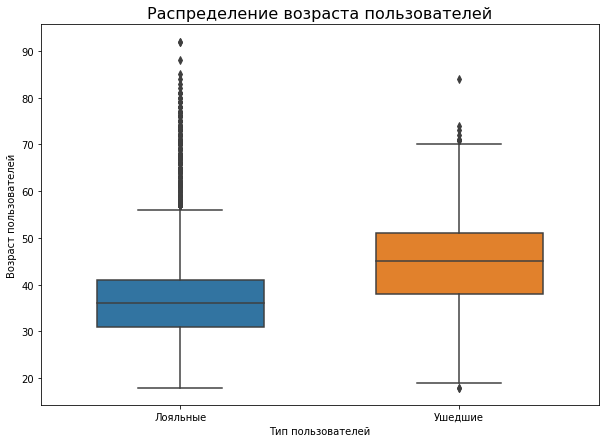

In [117]:

# plotting the scatter with data for both exited category
fig = plt.figure(figsize=(10,7))
box = sns.boxplot(
    data=churn_data,
    x='Exited',
    y='Age',
    orient='v',
    width=0.6
)
box.set_title('Распределение возраста пользователей', fontsize=16)
box.set_ylabel('Возраст пользователей')
box.set_xlabel('Тип пользователей')
fig.show()

- Налицо явная разница в возрасте среди ушедших и лояльных пользователей
- Разница в возрасте составляет около 10 лет
- Основная масса пользователей по достижении 40 лет уходит
- Банку следует усилить работу по возрастной группе 40-50 лет

-------

### Задание 9.5
- Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. 
- Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? 
- Если не видите явной взаимосвязи, укажите это.

Text(0, 0.5, 'Кредитный рейтинг')

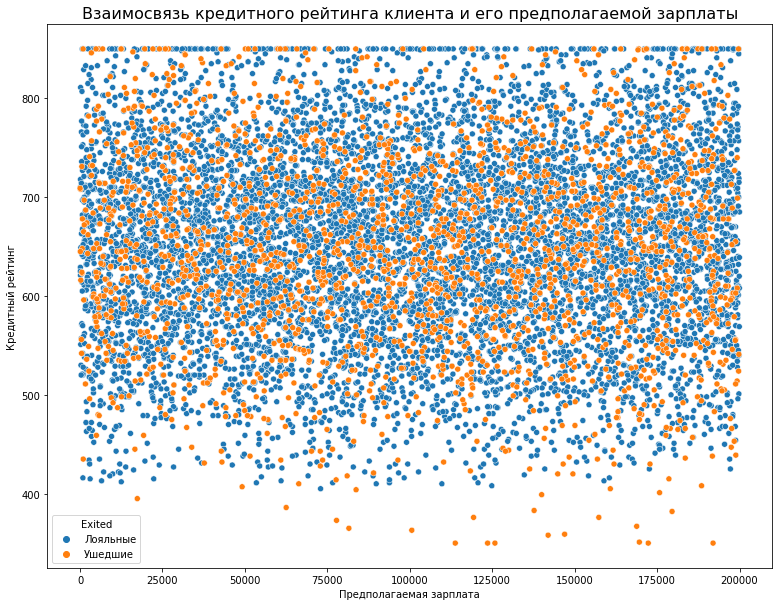

In [128]:
fig = plt.figure(figsize=(13, 10))

scatter = sns.scatterplot(
    data=churn_data,
    y='CreditScore',
    x='EstimatedSalary',
    hue='Exited'
)
scatter.set_title('Взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты', fontsize=16)
scatter.set_xlabel('Предполагаемая зарплата')
scatter.set_ylabel('Кредитный рейтинг')


- Взаимосвязь между предполагаемой зарплатой и кредитным рейтингом отсутствует
- Данная ситуация характерна как для лояльных, так и для ушедших клиентов
- Следует обратить внимание на проверку адекватности механизма расчета предполагаемой зарплаты, а также правильность оценки кредитного рейтинга

------

### Задание 9.5
- Кто чаще уходит, мужчины или женщины? 
- Постройте график, который иллюстрирует это.

Text(0, 0.5, 'Уход клиентов, %')

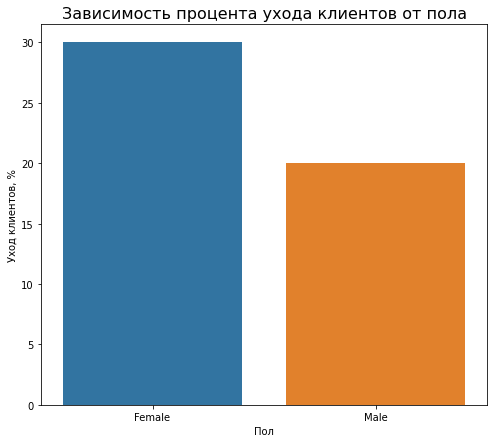

In [147]:
# we need to get digit data for 'Exited' back
churn_data['Exited_dig'] = churn_data['Exited'].apply(
    lambda s: 0 if s == 'Лояльные' else 1 if s == 'Ушедшие' else s)

gender_data = churn_data.groupby('Gender')['Exited_dig'].mean().round(1) * 100

figure = plt.figure(figsize=(8, 7))
barplot = sns.barplot(
    #data=gender_data,
    x=gender_data.index,
    y=gender_data,
)
barplot.set_title('Зависимость процента ухода клиентов от пола', fontsize=16)
barplot.set_xlabel('Пол')
barplot.set_ylabel('Уход клиентов, %')

- Доля ушедших женщин - 30%, мужчин - 20%
- Доля ушедших женщин превосходит долю ушедших мужчин в 1,5 раза
- Необходимо обратить внимание на повышения лояльности женщин к банку
-----

### Задание 9.7
- Как отток клиентов зависит от числа приобретённых у банка услуг? 
- Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

Text(0, 0.5, 'Количество клиентов')

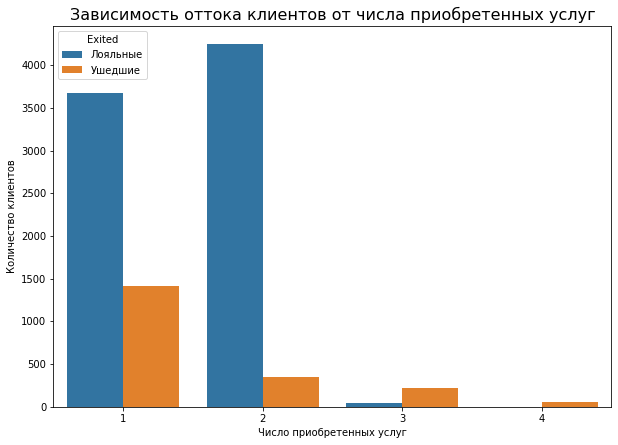

In [193]:
# data preparation
multibar_data = churn_data.groupby(
    ['NumOfProducts', 'Exited'], as_index=False
    )['Surname'].count()
# Surname was used just as a container
multibar_data.rename(columns={'Surname': 'Count'}, inplace=True)
figure = plt.figure(figsize=(10, 7))
multibar = sns.barplot(
    data=multibar_data,
    x='NumOfProducts',
    y='Count',
    hue='Exited',
    orient='v'
)
multibar.set_title('Зависимость оттока клиентов от числа приобретенных услуг', fontsize=16)
multibar.set_xlabel('Число приобретенных услуг')
multibar.set_ylabel('Количество клиентов')

- Большая доля ушедших клиентов наблюдается среди тех, кто пользовался только одной услуго банка
- Необходимо повышать лояльность за счет предложения дополнительных услуг
- Клиенты, пользующеся 3 или 4 услугами, со времен склонны покидать банк
---

### Задание 9.8
- Как влияет наличие статуса активного клиента на отток клиентов? 
- Постройте диаграмму, иллюстрирующую это. 
- Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

IsActiveMember
0    30.0
1    10.0
Name: Exited_dig, dtype: float64

Text(0, 0.5, 'Отток клиентов, %')

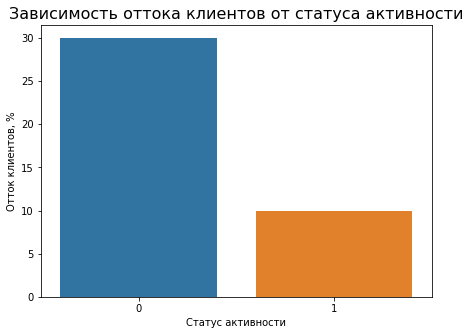

In [201]:

bar_data = churn_data.groupby('IsActiveMember')['Exited_dig'].mean().round(1) * 100
display(bar_data)

figure = plt.figure(figsize=(7, 5))
multibar = sns.barplot(
    x=bar_data.index,
    y=bar_data,
    orient='v'
)
multibar.set_title('Зависимость оттока клиентов от статуса активности', fontsize=16)
multibar.set_xlabel('Статус активности')
multibar.set_ylabel('Отток клиентов, %')

- отток неактивных клиентов в 3 раза выше оттока активных и составляет 30%
- необходимо работать над "активацией" неактивных клиентов
---

### Задание 9.9
- В какой стране доля ушедших клиентов больше? 
- Постройте тепловую картограмму, которая покажет это соотношение на карте мира. 
- Предположите, с чем это может быть связано.

In [218]:
choropleth_data = churn_data.groupby('Geography')['Exited_dig'].mean()*100

fig = px.choropleth(
    locations=choropleth_data.index,
    locationmode='country names',
    color=choropleth_data,
    range_color=[0, 50],
    title='Доля ушедших клиентов, %',
    width=700,
    height=500,
    scope='europe',
    color_continuous_scale='Reds',
)
fig.show()

- В Германии доля ушедших клиентов почти в 2 раза выше, чем в Испании и Франции
- Возможно, это связано с местными условиями, например с уровнем конкуренции на рынке
---

### Задание 9.10
- Переведите числовой признак CreditScore в категориальный. 
- Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. 
- Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.
- Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). 
- В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.

- На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.



In [220]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat)
churn_data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Exited_dig,CreditScoreCat
4999,15710408,Cunningham,584,Spain,Female,38,3,0.00,2,1,1,4525.40,Лояльные,0,Poor
6317,15654878,Yobanna,450,France,Male,29,7,117199.80,1,1,1,43480.63,Лояльные,0,Very_Poor
6316,15765643,Hamilton,725,France,Male,37,6,124348.38,2,0,1,176984.34,Лояльные,0,Good
6313,15812482,Young,575,France,Male,27,3,139301.68,1,1,0,99843.98,Лояльные,0,Poor
6312,15648136,Green,658,Germany,Female,28,9,152812.58,1,1,0,166682.57,Лояльные,0,Fair


Text(68.09375, 0.5, 'Кредитный рейтинг')

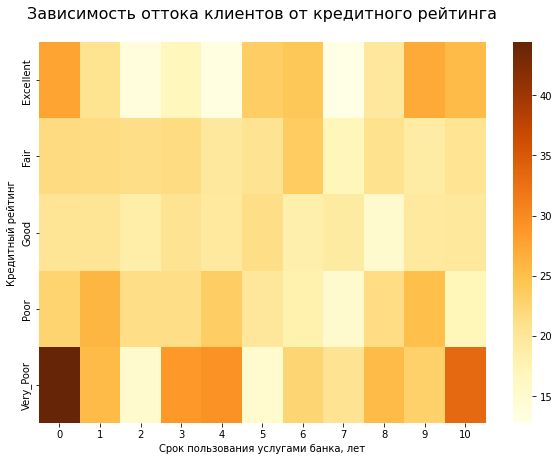

In [236]:
pivot = churn_data.pivot_table(
    index='CreditScoreCat',
    columns='Tenure',
    values='Exited_dig',
    aggfunc='mean'
)
pivot = pivot.apply(lambda x: round(x*100, 1))

figure = plt.figure(figsize=(10, 7))
heatmap = sns.heatmap(
    data=pivot,
    cmap='YlOrBr'
)
heatmap.set_title('Зависимость оттока клиентов от кредитного рейтинга\n', fontsize=16)
heatmap.set_xlabel('Срок пользования услугами банка, лет')
heatmap.set_ylabel('Кредитный рейтинг')

- Для клиентов с кредитным рейтингом "Excellent" пики оттока наступают в самом начале работы, на 5-6 году и на 9-10 году<br>
Необходимо обратить внимание на удержание данных клиентов на 0-1 году, а также на поддержку их лояльности на более длительных периодах

- В целом, отток в зависимости от срока пользования услугами по категориям "Poor", "Good", "Fair" практически равномерный с небольшими пиками  на 4-6 году работы.<br>
Необходимо принимать дополнительные меры для удержания таких клиентов
- Много пиков оттока есть у клиентов с кредитным рейтингом "Very Poor". <br>
Это свидетельствует о том, что большой процент оттока приходится на "неблагонадежных" клиентов, что в целом хорошо для банка.